In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(42)
plt.ion()

# Law of Large Numbers and Central Limit Theorem

In this notebook we will review the *Law of Large Numbers* (LLN) and *Central Limit Theorem* (CLT) from a practical perspective. We'll use the Bernoulli distribution to apply these concepts.

## Bernoulli Distribution

Defined as 

$$
X_i \sim Ber(X_i|\theta) = \left\{\begin{matrix}\theta & \text{if}\  x=1\\ 1 - \theta & \text{if}\ x=0\end{matrix}\right.
$$

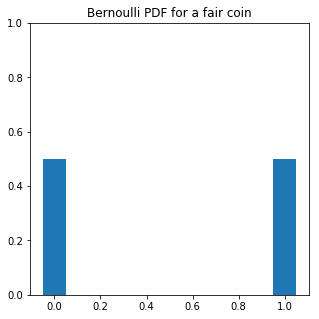

In [2]:
# fair coin is a bernoulli with theta=0.5
fig, ax = plt.subplots(figsize=(5, 5))
ax.bar([0, 1], [0.5, 0.5], [0.1])
ax.set_ylim([0, 1])
_ = ax.set_title('Bernoulli PDF for a fair coin')

## Law of Large Numbers

The average of the random variables $X_i$ converges to $\mu$ (the common mean) with probability 1.
$$
\frac{1}{n}\sum_i^{n} X_i \rightarrow \mu \quad \text{with probability 1}
$$

In other terms, the probability of the previous event is

$$
\left( P\left(\lim_{n\rightarrow\infty} \frac{1}{n}\sum_i^{n} X_i = \mu \right) = 1 \right)
$$

source: [mathematicalmonk](https://www.youtube.com/watch?v=wadzsURQFT4)

### Example: Flip fair coin N times

We know that the mean of a single Bernoulli variable $X_i$ is:

$$
\mathbb{E}_{Ber(X_i|\theta)} = \sum_{x=\{0,1\}}x \cdot p(X_i=x) = 1\cdot P(X_i=1) + 0\cdot P(X_i=0) = \theta
$$

can we get this result by averaging $n$ flips of a fair coin?

In [3]:
def draw_samples(n, p):
    """Draw n samples of a bernoulli distribution with parameter p"""
    return np.random.choice(2, n, p=[1-p, p])

In [4]:
n = [10, 100, 1000, 10000]
theta = 0.5

for n_flips in n:
    print(f'{n_flips} samples mean:', draw_samples(n_flips, theta).mean())

10 samples mean: 0.6
100 samples mean: 0.45
1000 samples mean: 0.505
10000 samples mean: 0.494


We confirm that as $n$ gets larger, it converges to the true mean of the distribution (0.5). Let's try with an unfair coin.

In [5]:
n = [10, 100, 1000, 10000]
theta = 0.8

for n_flips in n:
    print(f'{n_flips} samples mean:', draw_samples(n_flips, theta).mean())

10 samples mean: 0.9
100 samples mean: 0.86
1000 samples mean: 0.793
10000 samples mean: 0.8038


## Central Limit Theorem

The Central Limit Theorem states that
$$
\sqrt{\frac{n}{\sigma^2}} \left(\frac{1}{n}\sum_i^{n}X_i - \mu\right) \overset{d}{\longrightarrow} \mathcal{N}(0, 1)
$$
In other words, the normalized average of $n$ random variables converges in distribution to a normal even though	the random variable itself may not distribute normally!

Notice that:
- The average of the $n$ draws is a single draw from this distribution
- To test this statement, we need to repeat $N$ times the $n$ draws and see if the histogram resembles a normal distribution

### Example: Flip fair coin N times

In [6]:
def normalized_sum(X_mean, n, theta):
    sigma_squared = theta * (1 - theta)
    return np.sqrt(n / sigma_squared) * (X_mean - theta)

In [7]:
N = 10000
n = 10
theta = 0.5
outputs = []

for i in range(N):
    outputs.append(normalized_sum(draw_samples(n, theta).mean(), n, theta))

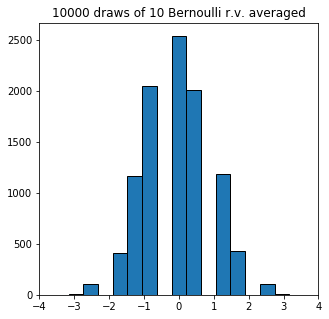

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(outputs, bins=15, edgecolor='k')
ax.set_xlim([-4, 4])
_ = ax.set_title(f'{N} draws of {n} Bernoulli r.v. averaged')

We can also check for larger $n$

In [9]:
N = 10000
n = 1000
theta = 0.5
outputs = []

for i in range(N):
    outputs.append(normalized_sum(draw_samples(n, theta).mean(), n, theta))

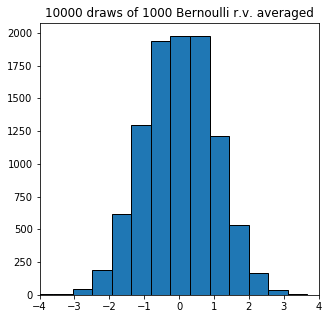

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(outputs, bins=15, edgecolor='k')
ax.set_xlim([-4, 4])
_ = ax.set_title(f'{N} draws of {n} Bernoulli r.v. averaged')

In [11]:
N = 10000
n = 10000
theta = 0.5
outputs = []

for i in range(N):
    outputs.append(normalized_sum(draw_samples(n, theta).mean(), n, theta))

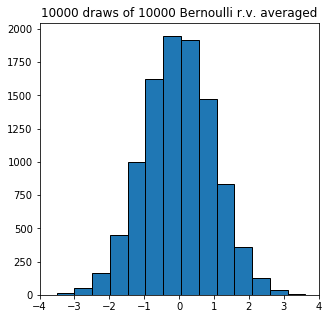

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(outputs, bins=15, edgecolor='k')
ax.set_xlim([-4, 4])
_ = ax.set_title(f'{N} draws of {n} Bernoulli r.v. averaged')

We conclude then that even though the draws come from a non-gaussian distribution, the CLT states that the average of the r.v. collection converges to a normal distribution as $n$ grows.